# Matplotlib

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.
Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code.
For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.

### Satrtup command
To connect to a GUI loop, execute the %matplotlib magic at your IPython prompt. This turns on inline plotting, where plot graphics will appear in your notebook. This has important implications for interactivity. For inline plotting, commands in cells below the cell that outputs a plot will not affect the plot. For example, changing the color map is not possible from cells below the cell that creates a plot. However, for other backends, such as qt4, that open a separate window, cells below those that create the plot will change the plot - it is a live object in memory.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
NL = '\n'

## PyPlot
matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes

In [ ]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to the ```plot()``` command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0,1,2,3].

plot() is a versatile command, and will take an arbitrary number of arguments. For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is ‘b-‘, which is a solid blue line.

In [ ]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

See the ```plot()``` documentation for a complete list of line styles and format strings. The ```axis()``` command in the example above takes a list of ```[xmin, xmax, ymin, ymax]``` and specifies the viewport of the axes.

In [ ]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### Controlling line properties
Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; see matplotlib.lines.Line2D. 

There are several ways to set line properties
 - Use keyword args:
```Python
plt.plot(x, y, linewidth=2.0)
```
 - Use the setter methods of a Line2D instance. plot returns a list of Line2D objects; e.g., line1, line2 = plot(x1, y1, x2, y2). In the code below we will suppose that we have only one line so that the list returned is of length 1. We use tuple unpacking with line, to get the first element of that list:
```Python
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialising
```
 - Use the setp() command. The example below uses a MATLAB-style command to set multiple properties on a list of lines. setp works transparently with a list of objects or a single object. You can either use python keyword arguments or MATLAB-style string/value pairs:
```Python
lines = plt.plot(x1, y1, x2, y2)
# use keyword args
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)
```

Here are the available Line2D properties.

|**Property**|**Value Type**
|-----|-----
|alpha|float
|animated|[True , False]
|antialiased or aa|[True , False]
|clip_box|a matplotlib.transform.Bbox instance
|clip_on|[True , False]
|clip_path|a Path instance and a Transform instance, a Patch
|color or c|any matplotlib color
|contains|the hit testing function
|dash_capstyle|['butt' , 'round' , 'projecting']
|dash_joinstyle|['miter' , 'round' , 'bevel']
|dashes|sequence of on/off ink in points
|data|(np.array xdata, np.array ydata)
|figure|a matplotlib.figure.Figure instance
|label|any string
|linestyle or ls|[ '-' , '--' , '-.' , ':' , 'steps' , ...]
|linewidth or lw|float value in points
|lod|[True , False]
|marker|[ '+' , ',' , '.' , '1' , '2' , '3' , '4' ]
|markeredgecolor or mec|any matplotlib color
|markeredgewidth or mew|float value in points
|markerfacecolor or mfc|any matplotlib color
|markersize or ms|float
|markevery|[ None , integer , (startind, stride) ]
|picker|used in interactive line selection
|pickradius|the line pick selection radius
|solid_capstyle|['butt' , 'round' , 'projecting']
|solid_joinstyle|['miter' , 'round' , 'bevel']
|transform|a matplotlib.transforms.Transform instance
|visible|[True , False]
|xdata|np.array
|ydata|np.array
|zorder|any number

To get a list of settable line properties, call the setp() function with a line or lines as argument

In [ ]:
lines = plt.plot([1, 2, 3])
plt.setp(lines)

### Working with multiple figures and axes
```pyplot``` have the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function``` gca()``` returns the current axes (a ```matplotlib.axes.Axes``` instance), and ```gcf() ```returns the current figure (```matplotlib.figure.Figure instance```). Normally, you don’t have to worry about this, because it is all taken care of behind the scenes.

In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

The ```figure()``` command here is optional because ```figure(1)``` will be created by default, just as a ```subplot(111)``` will be created by default if you don’t manually specify any axes. The ```subplot()``` command specifies ```numrows, numcols, fignum``` where ```fignum``` ranges from 1 to ```numrows\*numcols```. The commas in the subplot command are optional if ```numrows\*numcols<10```. So ```subplot(211)``` is identical to ```subplot(2, 1, 1)```. You can create an arbitrary number of subplots and axes. If you want to place an axes manually, i.e., not on a rectangular grid, use the ```axes()``` command, which allows you to specify the location as ```axes([left, bottom, width, height])``` where all values are in fractional (0 to 1) coordinates. 

You can create multiple figures by using multiple figure() calls with an increasing figure number. Of course, each figure can contain as many axes and subplots as your heart desires:

In [ ]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

You can clear the current figure with clf() and the current axes with cla(). If you are making lots of figures, you need to be aware of one more thing: the memory required for a figure is not completely released until the figure is explicitly closed with close(). Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the screen, is not enough, because pyplot maintains internal references until close() is called.

### Working with text
The ```text()``` command can be used to add text in an arbitrary location, and the ```xlabel()```, ```ylabel()``` and ```title()``` are used to add text in the indicated locations/

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

All of the ```text()``` commands return an ```matplotlib.text.Text``` instance. Just as with with lines above, you can customize the properties by passing keyword arguments into the text functions or using ```setp()```:
```Python
t = plt.xlabel('my data', fontsize=14, color='red')
```

matplotlib accepts TeX equation expressions in any text expression. For example to write the expression $\sigma_i=15$ in the title, you can write a TeX expression surrounded by dollar signs:
```Python
plt.title(r'$\sigma_i=15$')
```
The r preceding the title string is important – it signifies that the string is a raw string and not to treat backslashes as python escapes. matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts.

### Annotating text
The uses of the basic ```text()``` command above place text at an arbitrary position on the Axes. A common use for text is to annotate some feature of the plot, and the ```annotate()``` method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument ``xy`` and the location of the text ```xytext```. Both of these arguments are ```(x,y)``` tuples.

In [ ]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

### Logarithmic and other nonlinear axis
```matplotlib.pyplot``` supports not only linear axis scales, but also logarithmic and logit scales. This is commonly used if data spans many orders of magnitude. Changing the scale of an axis is easy:
```Python
plt.xscale(‘log’)
```
An example of four plots with the same data and different scales for the y axis is shown below.

In [ ]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1, figsize = (8, 8))

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

### Image

Loading image data is supported by the Pillow library. Natively, matplotlib only supports PNG images. The commands shown below fall back on Pillow if the native read fails.

In [2]:
img=mpimg.imread('img/stinkbug.png')
print(img)
print(NL, img.dtype)

[[[ 0.40784314  0.40784314  0.40784314]
  [ 0.40784314  0.40784314  0.40784314]
  [ 0.40784314  0.40784314  0.40784314]
  ..., 
  [ 0.42745098  0.42745098  0.42745098]
  [ 0.42745098  0.42745098  0.42745098]
  [ 0.42745098  0.42745098  0.42745098]]

 [[ 0.41176471  0.41176471  0.41176471]
  [ 0.41176471  0.41176471  0.41176471]
  [ 0.41176471  0.41176471  0.41176471]
  ..., 
  [ 0.42745098  0.42745098  0.42745098]
  [ 0.42745098  0.42745098  0.42745098]
  [ 0.42745098  0.42745098  0.42745098]]

 [[ 0.41960785  0.41960785  0.41960785]
  [ 0.41568628  0.41568628  0.41568628]
  [ 0.41568628  0.41568628  0.41568628]
  ..., 
  [ 0.43137255  0.43137255  0.43137255]
  [ 0.43137255  0.43137255  0.43137255]
  [ 0.43137255  0.43137255  0.43137255]]

 ..., 
 [[ 0.43921569  0.43921569  0.43921569]
  [ 0.43529412  0.43529412  0.43529412]
  [ 0.43137255  0.43137255  0.43137255]
  ..., 
  [ 0.45490196  0.45490196  0.45490196]
  [ 0.4509804   0.4509804   0.4509804 ]
  [ 0.4509804   0.4509804   0.45098

Note the dtype there - float32. Matplotlib has rescaled the 8 bit data from each channel to floating point data between 0.0 and 1.0. As a side note, the only datatype that Pillow can work with is uint8. Matplotlib plotting can handle float32 and uint8, but image reading/writing for any format other than PNG is limited to uint8 data.

Each inner list represents a pixel. Here, with an RGB image, there are 3 values. Since it’s a black and white image, R, G, and B are all similar. An RGBA (where A is alpha, or transparency), has 4 values per inner list, and a simple luminance image just has one value (and is thus only a 2-D array, not a 3-D array). For RGB and RGBA images, matplotlib supports float32 and uint8 data types. For grayscale, matplotlib supports only float32. If your array data does not meet one of these descriptions, you need to rescale it.


### Plotting numpy arrays as images
So, you have your data in a numpy array. Let’s render it. In Matplotlib, this is performed using the ```imshow()``` function. Here we’ll grab the plot object. This object gives you an easy way to manipulate the plot from the prompt.

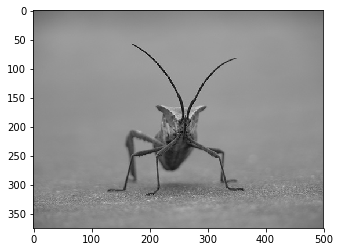

In [3]:
imgplot = plt.imshow(img)

### Applying pseudocolor schemes to image plots
Pseudocolor can be a useful tool for enhancing contrast and visualizing your data more easily. This is especially useful when making presentations of your data using projectors - their contrast is typically quite poor.

Pseudocolor is only relevant to single-channel, grayscale, luminosity images. We currently have an RGB image. Since R, G, and B are all similar, we can just pick one channel of our data:

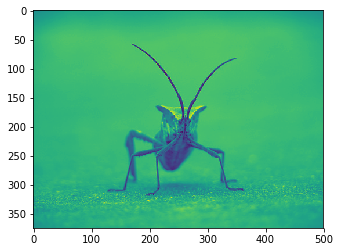

In [4]:
lum_img = img[:,:,0]
plt.imshow(lum_img)

Now, with a luminosity (2D, no color) image, the default colormap (aka lookup table, LUT), is applied. The default is called jet. There are plenty of others to choose from

In [ ]:
plt.imshow(lum_img, cmap="hot")

Note that you can also change colormaps on existing plot objects using the set_cmap() method:

In [ ]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

However, remember that in the IPython notebook with the inline backend, you can’t make changes to plots that have already been rendered. If you create imgplot here in one cell, you cannot call set_cmap() on it in a later cell and expect the earlier plot to change. Make sure that you enter these commands together in one cell. plt commands will not change plots from earlier cells.

### Color scale reference
It’s helpful to have an idea of what value a color represents. We can do that by adding color bars.

In [ ]:
imgplot = plt.imshow(lum_img, cmap = 'cool')
plt.colorbar()

### Examining a specific data range
Sometimes you want to enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the ```hist()``` function.

In [ ]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

Most often, the “interesting” part of the image is around the peak, and you can get extra contrast by clipping the regions above and/or below the peak. In our histogram, it looks like there’s not much useful information in the high end (not many white things in the image). Let’s adjust the upper limit, so that we effectively “zoom in on” part of the histogram. We do this by passing the clim argument to imshow. You could also do this by calling the set_clim() method of the image plot object, but make sure that you do so in the same cell as your plot command when working with the IPython Notebook - it will not change plots from earlier cells.

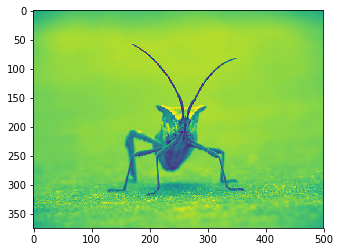

In [5]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

### Customizing Location of Subplot Using GridSpec
```GridSpec``` specifies the geometry of the grid that a subplot will be placed. The number of rows and number of columns of the grid need to be set. Optionally, the subplot layout parameters (e.g., left, right, etc.) can be tuned.
 
```SubplotSpec``` specifies the location of the subplot in the given GridSpec.
 
```subplot2grid``` a helper function that is similar to “pyplot.subplot” but uses 0-based indexing and let subplot to occupy multiple cells.

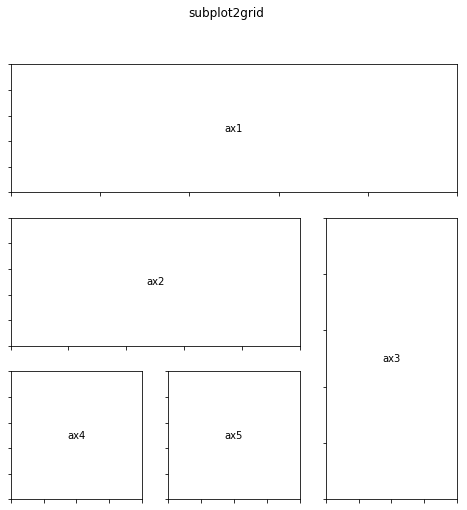

In [8]:
def make_ticklabels_invisible(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        for tl in ax.get_xticklabels() + ax.get_yticklabels():
            tl.set_visible(False)

plt.figure(0, figsize=(8,8))
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2, 0))
ax5 = plt.subplot2grid((3,3), (2, 1))

plt.suptitle("subplot2grid")
make_ticklabels_invisible(plt.gcf())
plt.show()

### GridSpec and SubplotSpec
A gridspec instance provides array-like (2d or 1d) indexing that returns the SubplotSpec instance. For, SubplotSpec that spans multiple cells, use slice.

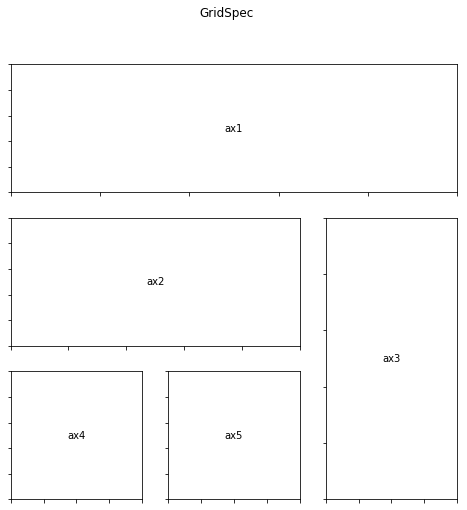

In [10]:
from matplotlib.gridspec import GridSpec


def make_ticklabels_invisible(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        for tl in ax.get_xticklabels() + ax.get_yticklabels():
            tl.set_visible(False)


plt.figure(figsize=(8,8))

gs = GridSpec(3, 3)
ax1 = plt.subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0,0), colspan=3))
ax2 = plt.subplot(gs[1,:-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1,0])
ax5 = plt.subplot(gs[-1,-2])

plt.suptitle("GridSpec")
make_ticklabels_invisible(plt.gcf())

plt.show()

### Adjust GridSpec layout
When a GridSpec is explicitly used, you can adjust the layout parameters of subplots that are created from the gridspec.
This is similar to subplots_adjust, but it only affects the subplots that are created from the given GridSpec.

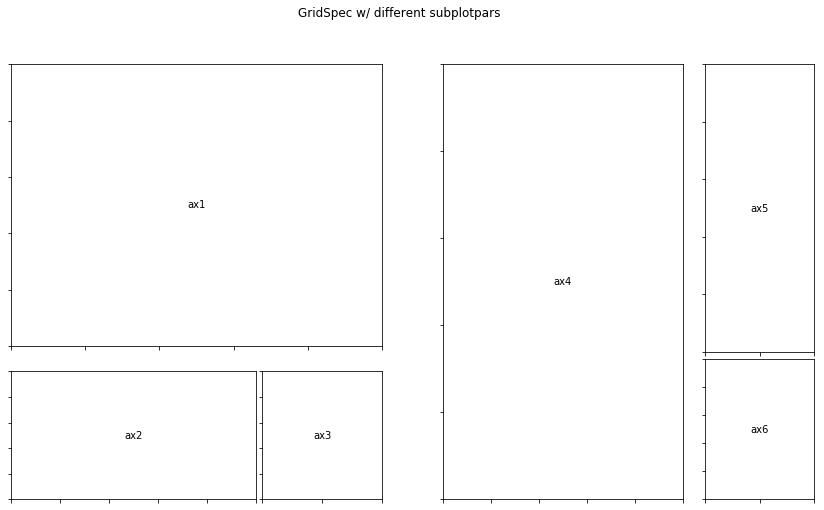

In [14]:
from matplotlib.gridspec import GridSpec


def make_ticklabels_invisible(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        for tl in ax.get_xticklabels() + ax.get_yticklabels():
            tl.set_visible(False)



# demo 3 : gridspec with subplotpars set.

f = plt.figure(figsize=(12,8))

plt.suptitle("GridSpec w/ different subplotpars")

gs1 = GridSpec(3, 3)
gs1.update(left=0.05, right=0.48, wspace=0.05)
ax1 = plt.subplot(gs1[:-1, :])
ax2 = plt.subplot(gs1[-1, :-1])
ax3 = plt.subplot(gs1[-1, -1])

gs2 = GridSpec(3, 3)
gs2.update(left=0.55, right=0.98, hspace=0.05)
ax4 = plt.subplot(gs2[:, :-1])
ax5 = plt.subplot(gs2[:-1, -1])
ax6 = plt.subplot(gs2[-1, -1])

make_ticklabels_invisible(plt.gcf())

plt.show()



### GridSpec with Varying Cell Sizes
By default, GridSpec creates cells of equal sizes. You can adjust relative heights and widths of rows and columns. Note that absolute values are meaningless, only their relative ratios matter

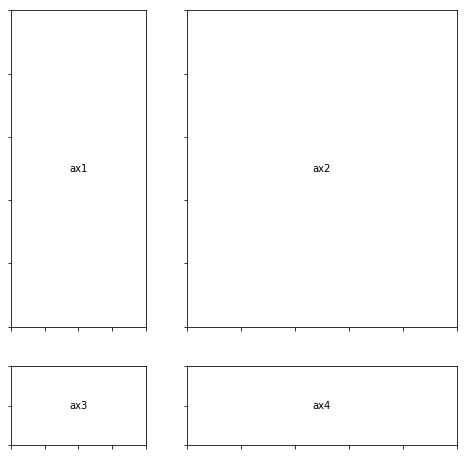

In [15]:
import matplotlib.gridspec as gridspec

def make_ticklabels_invisible(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        for tl in ax.get_xticklabels() + ax.get_yticklabels():
            tl.set_visible(False)



f = plt.figure(figsize=(8,8))

gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,2],
                       height_ratios=[4,1]
                       )

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

make_ticklabels_invisible(f)
plt.show()
